In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
# Pour ignorer les warnings
import warnings
warnings.filterwarnings("ignore")

# Chargement du dataset

In [ ]:
columns = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]

df = pd.read_csv("auto-mpg.data", delim_whitespace=True, names=columns, na_values='?')
print(" Données chargées :")
print(df.head())

 Données chargées :
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


# Nettoyage du dataset

In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [6]:
# Supprimer les lignes avec valeurs manquantes
df = df.dropna()

# Supprimer la colonne texte 'car_name'
df = df.drop(columns=['car_name'])

print("\n Dimensions du dataset nettoyé :", df.shape)



 Dimensions du dataset nettoyé : (392, 8)


# Étude de corrélation

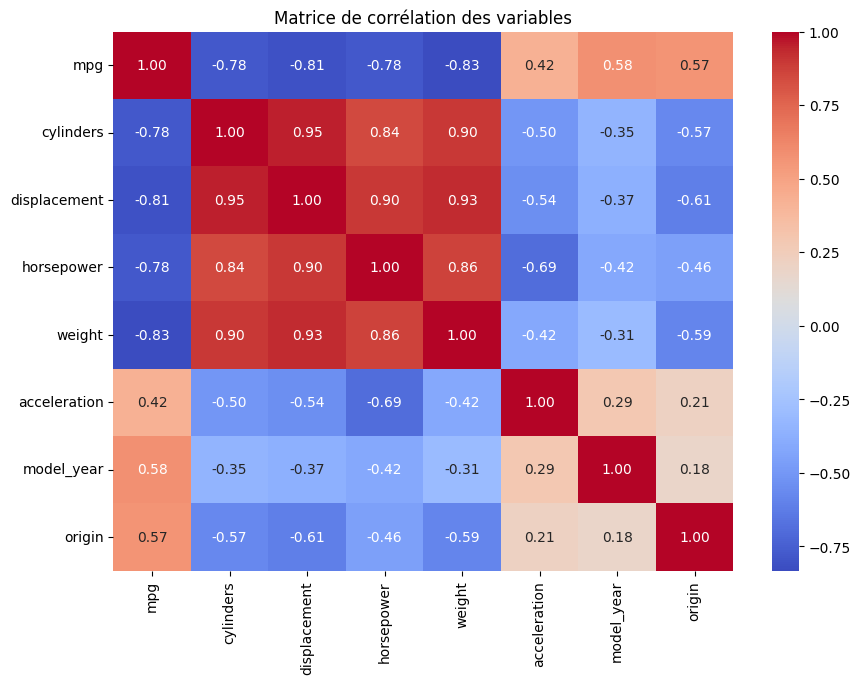

In [7]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables")
plt.show()

#  Préparation des données (scaling + split)

In [8]:
X = df.drop(columns=['mpg'])
y = df['mpg']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Modélisation (4 modèles)


In [9]:
models = {
    "Régression Multiple": LinearRegression(),
    "ELM (approximation avec MLP 1 couche)": MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500),
    "BP (réseau de neurones profond)": MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', max_iter=1000),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"\n {name}")
    print(f"   RMSE : {rmse:.2f}")
    print(f"   R²   : {r2:.3f}")


 Régression Multiple
   RMSE : 3.27
   R²   : 0.790

 ELM (approximation avec MLP 1 couche)
   RMSE : 3.61
   R²   : 0.744

 BP (réseau de neurones profond)
   RMSE : 2.58
   R²   : 0.870

 XGBoost
   RMSE : 2.66
   R²   : 0.861


# Évaluation des modèles (comparaison)

In [10]:
results_df = pd.DataFrame(results).T
print("\n\n Résumé des performances :")
print(results_df)



 Résumé des performances :
                                           RMSE        R2
Régression Multiple                    3.272746  0.790150
ELM (approximation avec MLP 1 couche)  3.614478  0.744038
BP (réseau de neurones profond)        2.576726  0.869917
XGBoost                                2.662774  0.861084


# Visualisations

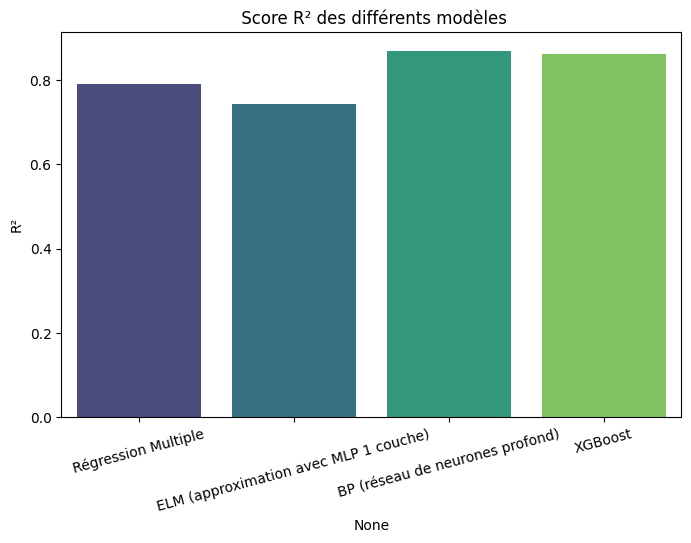

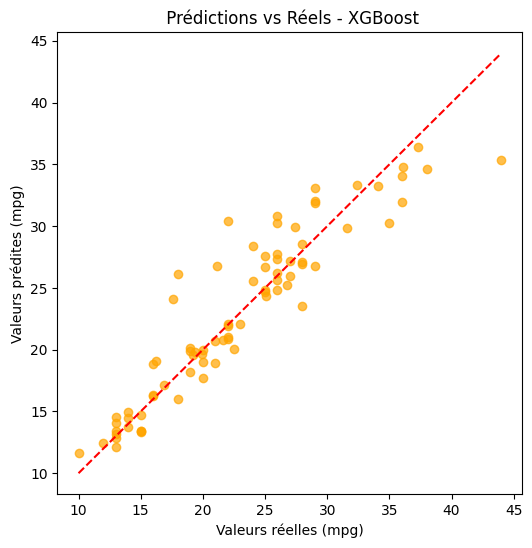

In [11]:

plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.title(" Score R² des différents modèles")
plt.ylabel("R²")
plt.xticks(rotation=15)
plt.show()

## 7.2 - Prédictions vs Réels (exemple : XGBoost)
best_model = models["XGBoost"]
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles (mpg)")
plt.ylabel("Valeurs prédites (mpg)")
plt.title(" Prédictions vs Réels - XGBoost")
plt.show()

 Données chargées et nettoyées : (392, 8)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


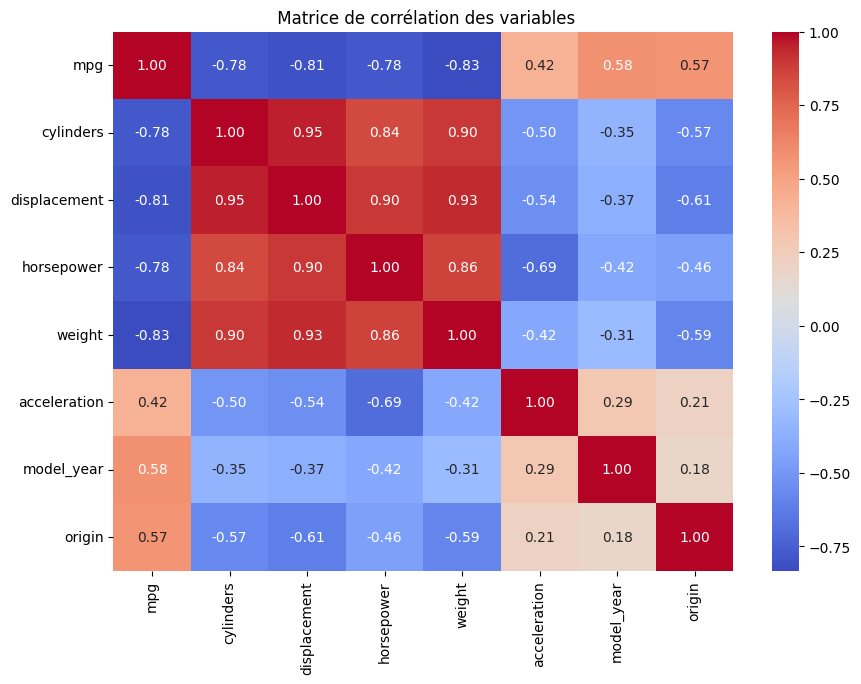


 Régression Multiple
   ➤ RMSE : 3.273
   ➤ R²   : 0.790

 ELM (approximation 1 couche)
   ➤ RMSE : 2.645
   ➤ R²   : 0.863

 BP (Deep Neural Network)
   ➤ RMSE : 2.681
   ➤ R²   : 0.859

 XGBoost
   ➤ RMSE : 2.547
   ➤ R²   : 0.873

 Résumé des performances :
                                  RMSE        R²
XGBoost                       2.546728  0.872928
ELM (approximation 1 couche)  2.644605  0.862973
BP (Deep Neural Network)      2.680617  0.859216
Régression Multiple           3.272746  0.790150


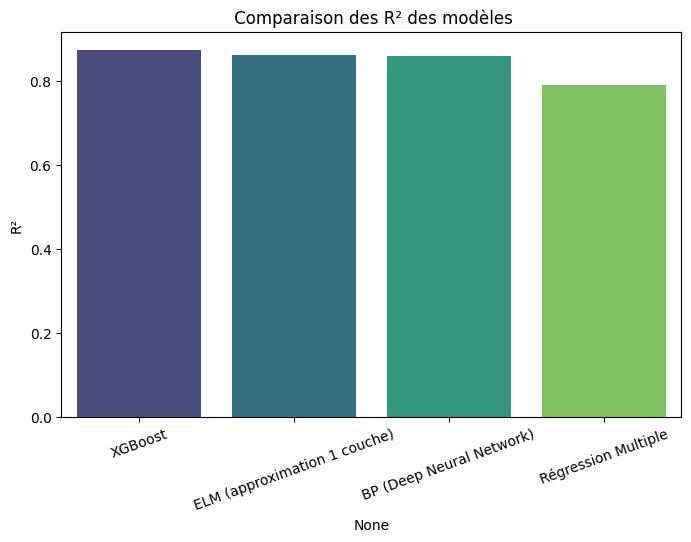

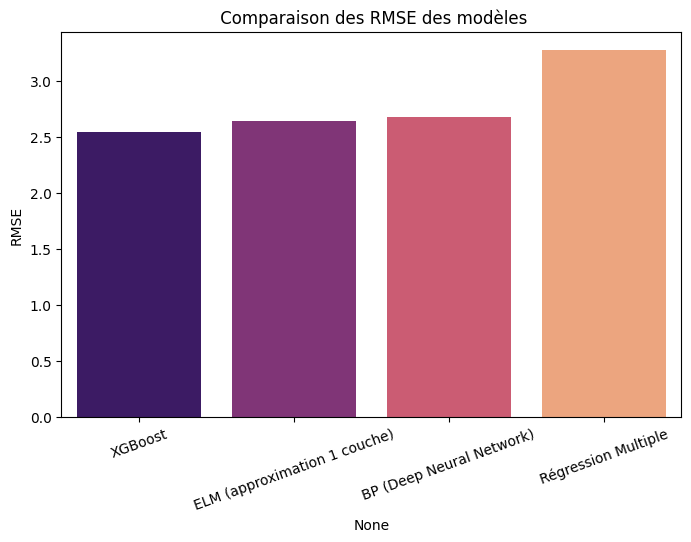

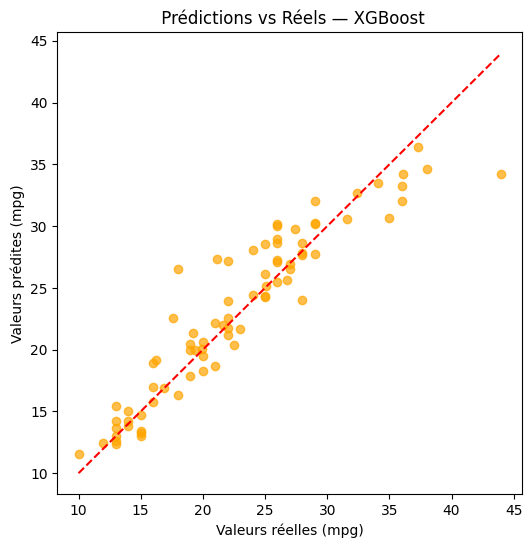

In [12]:

#  PROJET ML : Prédiction de la consommation de carburant (mpg)


#  Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")


# Chargement et nettoyage du dataset


# Colonnes selon la description du dataset
columns = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]

# Charger le fichier auto-mpg.data (avec séparateur d'espaces)
df = pd.read_csv("auto-mpg.data", delim_whitespace=True, names=columns, na_values='?')

# Supprimer les lignes avec valeurs manquantes
df = df.dropna()

# Supprimer les colonnes textuelles
df = df.drop(columns=['car_name'])

print(" Données chargées et nettoyées :", df.shape)
print(df.head())


#  Étude de corrélation


plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(" Matrice de corrélation des variables")
plt.show()


#  Préparation des données


X = df.drop(columns=['mpg'])
y = df['mpg']

# Séparation Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Modélisation : 4 modèles (dont un réseau profond)


models = {
    "Régression Multiple": LinearRegression(),

    "ELM (approximation 1 couche)": MLPRegressor(
        hidden_layer_sizes=(200,),
        activation='relu',
        solver='adam',
        max_iter=800,
        random_state=42
    ),

    "BP (Deep Neural Network)": MLPRegressor(
        hidden_layer_sizes=(256, 128, 64, 32),
        activation='relu',
        solver='adam',
        alpha=0.0005,
        learning_rate='adaptive',
        max_iter=2000,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

results = {}

# Entraînement + Évaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R²": r2}

    print(f"\n {name}")
    print(f"   ➤ RMSE : {rmse:.3f}")
    print(f"   ➤ R²   : {r2:.3f}")


#  Évaluation comparative


results_df = pd.DataFrame(results).T.sort_values("RMSE")
print("\n Résumé des performances :")
print(results_df)


# Visualisations


## 7.1 - Comparaison des R²
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")
plt.title(" Comparaison des R² des modèles")
plt.ylabel("R²")
plt.xticks(rotation=20)
plt.show()

## 7.2 - Comparaison des RMSE
plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="magma")
plt.title(" Comparaison des RMSE des modèles")
plt.ylabel("RMSE")
plt.xticks(rotation=20)
plt.show()

## 7.3 - Prédictions vs Réels (meilleur modèle)
best_model_name = results_df["R²"].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles (mpg)")
plt.ylabel("Valeurs prédites (mpg)")
plt.title(f" Prédictions vs Réels — {best_model_name}")
plt.show()
